# Módulo 23 - Combinação de Modelos I

## Exercício 1

Luciana Gonzaga

---

## Bagging

### Conceito:

Bagging, ou Bootstrap Aggregating, é uma técnica de aprendizado de máquina que combina a previsão de múltiplos modelos treinados em amostras de dados diferentes, geralmente modelos de árvore de decisão, visando melhorar o desempenho do modelo final.

É frequentemente usado para reduzir a variância do modelo, tornando-o mais estável e menos propenso ao sobreajuste aos dados de treinamento e, assim, produzir previsões mais robustas e precisas.

Um dos algoritmos mais conhecidos baseado em Bagging é o Random Forest, usando árvores de decisão cocmo modelo base. Outras técnicas de ensemble, como Gradient Boosting e AdaBoost, também aproveitam conceitos semelhantes.

### Passo-a-passo:

O processo de Bagging envolve várias etapas:

**1. Amostragem por reposição (Bootstrap):** Vários conjuntos de dados de treinamento são criados por amostragem aleatória com reposição do conjunto de treinamento original. Ou seja, cada conjunto de treinamento bootstrap é uma amostra aleatória dos dados de treinamento originais e pode conter duplicatas de exemplos de treinamento.

**2. Treinamento de Modelos:** Um modelo de aprendizado de máquina é treinado separadamente em cada conjunto de dados bootstrap, resultando na criação de vários modelos diferentes (**Base learners**).

**3. Combinação dos Modelos (Aggregating):** Os modelos treinados são combinados de alguma maneira para formar um modelo final. Em problemas de:

- Classificação:  geralmente envolve a quantidade majoritária de "votos", em que o modelo final faz uma previsão tomando a classe mais frequente entre os modelos individuais.
- Regressão: a previsão final pode ser a média das previsões dos modelos individuais.

### Implementação:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Conjunto de dados de exemplo (Iris):

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Separação da base em treino e teste:

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### *Bootstrap:*

In [4]:
# Modelo base (árvore de decisão):
base_model = DecisionTreeClassifier()

# Definir o BaggingClassifier com 100 estimadores (modelos base):
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)


#### *Modelagem:*

In [5]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

#### *Agregação:*

In [6]:
y_pred = bagging_model.predict(X_test)

#### Avaliação do modelo final:

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Bagging: {accuracy:.2f}")

Acurácia do modelo Bagging: 1.00


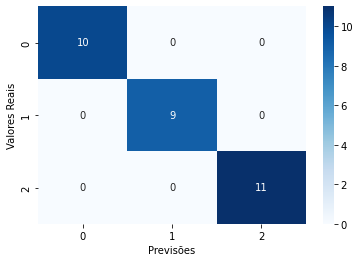

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()